In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [43]:
df = pd.read_csv('../cleaned_data/final_df.csv', index_col=0)
pd.set_option('display.max_columns', None)


In [44]:
df

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.533495,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.248565,-1.070927,0.077172,-0.538606,1,-0.590592,-1.054430,0.522998,1,-0.540759,-0.267683,2,0.010108,0
1,-0.659654,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.248565,-1.070927,0.077172,-0.538606,1,-0.590592,-0.702438,0.542985,1,-0.540759,-0.267056,4,0.010108,0
2,-0.222734,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.117360,-1.549281,-0.651416,-0.538606,1,-0.590592,-0.157033,0.552979,1,-0.540759,-0.209557,5,0.010108,0
3,0.214187,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.051758,-1.549281,0.077172,-0.538606,1,-0.590592,-1.453415,0.562973,1,-0.540759,-0.286724,1,0.010108,0
4,0.651107,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-0.920553,-1.549281,-0.214263,-0.538606,1,-0.590592,-0.967820,0.572967,1,-0.540759,-0.276465,5,0.010108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78309,1.524948,-0.369051,1,-0.772437,1.728625,1.126397,1.550005,0.455350,4912,0.719507,1.799198,1.103024,0.743442,0,1.726500,0.978280,-1.375827,2,-0.451970,-0.290023,0,0.010108,2
78310,-1.096574,-0.744596,9,-0.248947,-0.592483,0.169607,-0.926497,-0.894754,683,0.063483,-1.230378,0.110687,-0.795016,1,-0.848669,-0.598796,1.632311,1,-0.653567,-0.218700,4,0.010108,2
78311,0.651107,-0.744596,9,-0.248947,-0.592483,0.169607,-0.926497,-0.894754,683,0.325893,-1.230378,0.110687,-0.795016,1,-0.848669,1.788897,1.672286,1,-0.653567,-0.295216,0,0.010108,1
78312,1.088027,-0.744596,9,-0.248947,-0.592483,0.169607,-0.926497,-0.894754,683,-0.133324,-1.230378,0.110687,-0.795016,1,-0.848669,0.288262,1.682280,1,-0.653567,-0.184061,3,0.010108,2


In [45]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [47]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)


In [48]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
# Make predictions on the test data
y_pred = rf.predict(X_test)


Before Dropping 
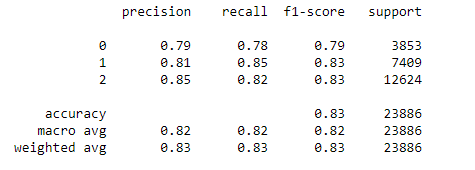

In [50]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      3833
           1       0.80      0.85      0.83      7369
           2       0.84      0.82      0.83     12293

    accuracy                           0.82     23495
   macro avg       0.81      0.82      0.82     23495
weighted avg       0.82      0.82      0.82     23495



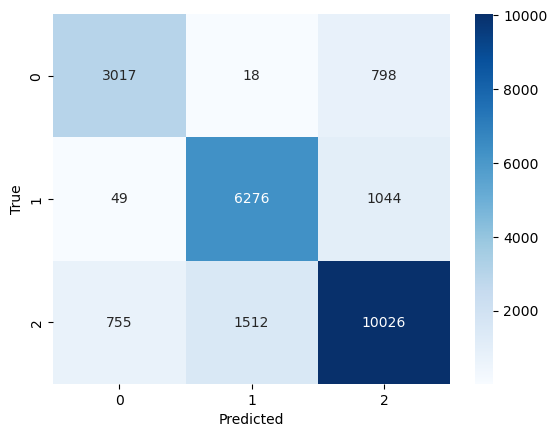

In [51]:
# Assuming y_test contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [52]:
# So lets try to improve the accuracy by trying to balance the datasets 

In [53]:
df_copy = df.copy() 

In [54]:
df_copy['Credit_Score'].value_counts() 

2    41148
1    24469
0    12697
Name: Credit_Score, dtype: int64

In [55]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_copy[(df_copy['Credit_Score']==2)] 
df_minority = df_copy[(df_copy['Credit_Score']==1)] 
df_minority2 = df_copy[(df_copy['Credit_Score']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 41808, # to match majority class
                                 random_state=0)  # reproducible results
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,    # sample with replacement
                                 n_samples= 41808, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_minority_upsampled2, df_majority])

In [56]:
df_upsampled = df_upsampled.drop(df.columns[0], axis=1)

In [57]:
df_upsampled.to_csv('../cleaned_data/upsampled_final_df.csv')

1    41808
0    41808
2    41148
Name: Credit_Score, dtype: int64

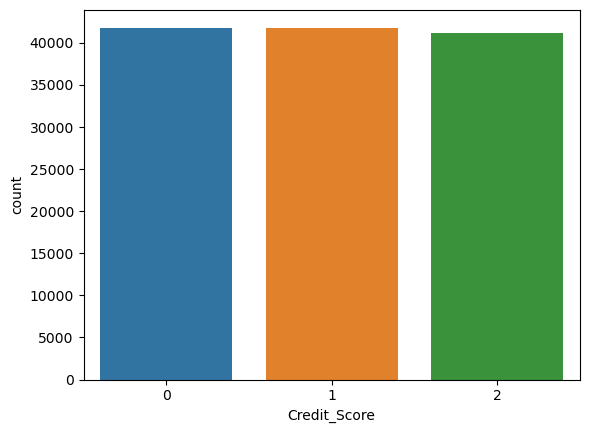

In [58]:
#Counting 1 and 0 Value in Response column
sns.countplot(x = 'Credit_Score', data = df_upsampled)
df_upsampled['Credit_Score'].value_counts()

In [59]:
df2= df_upsampled.copy()

In [60]:
X = df2.drop('Credit_Score', axis=1)
y = df2['Credit_Score']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [62]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)


In [63]:
rf.fit(X_train, y_train)




RandomForestClassifier(random_state=0)

In [64]:
# Make predictions on the test data
y_pred = rf.predict(X_test)


Before dropping highly correlated 
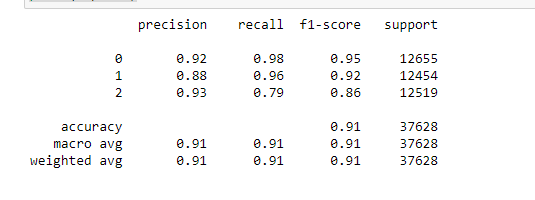

In [65]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     12637
           1       0.87      0.96      0.92     12455
           2       0.94      0.77      0.85     12338

    accuracy                           0.91     37430
   macro avg       0.91      0.91      0.90     37430
weighted avg       0.91      0.91      0.91     37430



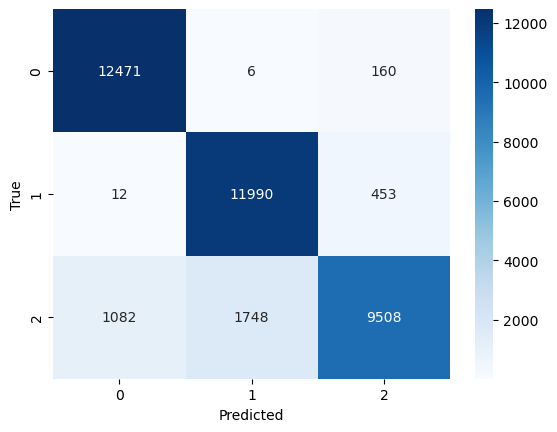

In [66]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Hence we were able to increase the Accuracy of the Random Forest Classifier from 82% to 91% . Also the Overall classification report is also improved. 

In [67]:
# From the Hyperparamter tunining the best parameter was found 

In [68]:
# best_param = {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}

In [69]:
best_param= {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [70]:
best_model =  RandomForestClassifier(**best_param)

In [71]:
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

Accuracy: 0.9131232061230998


In [72]:
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9082554100988511


In [73]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     12637
           1       0.87      0.96      0.92     12455
           2       0.94      0.77      0.85     12338

    accuracy                           0.91     37430
   macro avg       0.91      0.91      0.91     37430
weighted avg       0.91      0.91      0.91     37430



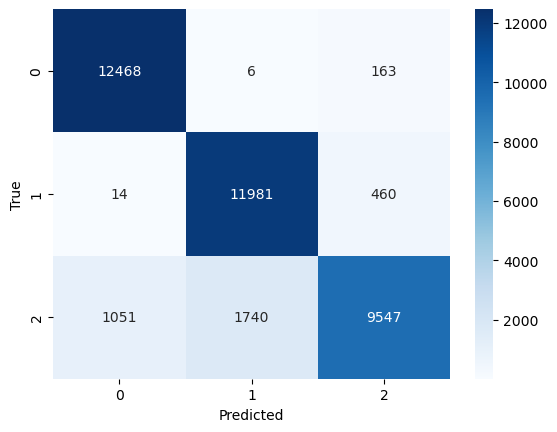

In [74]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [76]:
import pickle

# Define the path and filename for the .pkl file
filename = '../models/rf_model.pkl'

# Open a file in binary mode and save the model using the pickle module
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)